Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233

Confusion Matrix:
[[952 214]
 [158 909]]
Accuracy Score:
0.8334079713390058


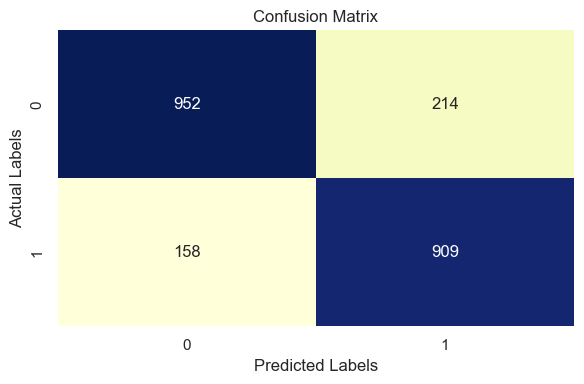

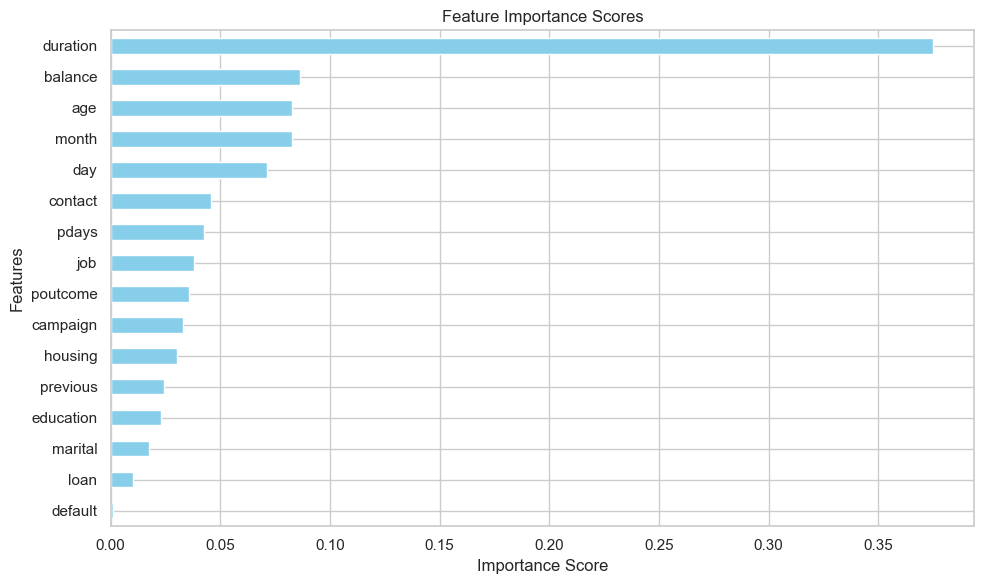

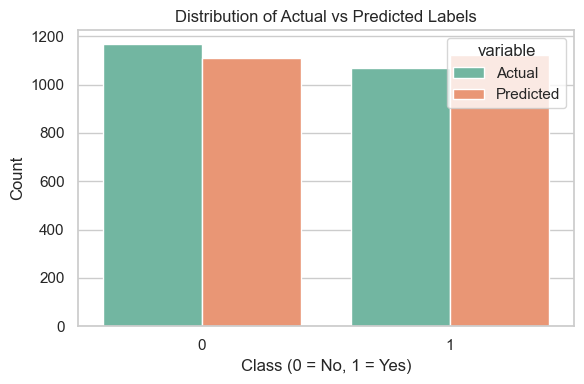

In [1]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visual style for plots
sns.set(style='whitegrid', palette='pastel')

# Load the dataset
df = pd.read_csv(r"C:\Users\Nani\Downloads\bank.csv")  # Update path if needed

# Clean column names to remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Convert the 'deposit' column to numeric values (yes → 1, no → 0)
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Encode all categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Define input features (X) and target variable (y)
X = df.drop('deposit', axis=1)
y = df['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict target values for the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Plot 1: Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.tight_layout()
plt.show()

# Plot 2: Feature Importance

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importance Scores")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Plot 3: Actual vs Predicted Distribution

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(6, 4))
sns.countplot(data=result_df.melt(), x='value', hue='variable', palette='Set2')
plt.title("Distribution of Actual vs Predicted Labels")
plt.xlabel("Class (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
